In [1]:
import investpy

# Version 1 


## Crypto
* Bitcoin

## Alternative
* Gold

## Stock Indice
* Dow 30

--------------------------------------------------------------------------

--------------------------------------------------------------------------
# Version 2 


## Crypto
* Bitcoin
* Ethereum
* Binance Coin
* Tether
* Polkadot
* Cardano
* XRP
* Uniswap
* Litecoin
* Chainlink
* THETA
* Filecoin
* USD Coin
* Bitcoin Cash
* Stellar
* BitTorrent
* Klaytn
* TRON
* Wrapped Bitcoin
* Dogecoin

## Alternative
* Gold
* [Find] silver
* [Find] Yield10 year
* [Find] Yield2 year
* [Find] Yield3 month
* [Find] agriculture price 3 product
* [Find] Inflation Bond
* [Find] oil wti 
* [Find] ??? unemployment rate/ GDP/ Nonfarm payroll




## Stock Indice
####  US
* Dow 30
* S&P 500

####  United Kingdom
* FTSE 100


#### Australia
* S&P/ASX 200

#### Canada
* S&P/TSX

#### China
* CSI 1000
* Shanghai

#### France
* CAC 40
* CAC All Shares


#### Germany
* DAX
* Euro Stoxx 50

#### Hong Kong
* FTSE China 50
* Hang Seng

#### India
* BSE Sensex
* Nifty 50

#### Japan
* Nikkei 225

#### South Korea
* KOSPI

#### Switzerland
* SMI 

#### Thailand
* SET



# Plan and modeling outline

1. Path Plot
2. Correlation PLot of return [Monthly]
3. Model1 : Regression on Error Term
4. Model2 : PCA orthogonal variable
5. Model3 : Impulse respond Function
6. Model4 : Predictability on Bitcoin by gold and stock [Inflation and Y]

# Version 1 

In [ ]:
import numpy as np
import pandas as pd

In [2]:
import investpy

Stock_DJ = investpy.indices.get_index_historical_data(index = "Dow 30", country = "United States", from_date='01/01/1990',  to_date='01/01/2022')
Crypto_BTC = investpy.get_crypto_historical_data(crypto='bitcoin', from_date='01/01/1990', to_date='01/01/2022')
Alter_GOLD = investpy.get_commodity_historical_data(commodity='gold', from_date='01/01/1990', to_date='01/01/2022')

Stock_DJ['return'] = np.log(Stock_DJ['Close']) - np.log(Stock_DJ['Close']).shift(1) 
Crypto_BTC['return'] = np.log(Crypto_BTC['Close']) - np.log(Crypto_BTC['Close']).shift(1) 
Alter_GOLD['return'] = np.log(Alter_GOLD['Close']) - np.log(Alter_GOLD['Close']).shift(1) 




In [3]:
# prep
import pandas as pd
import numpy as np

In [4]:
Alter_GOLD['date'] = Alter_GOLD.index
Alter_GOLD['year'] = Alter_GOLD.date.dt.year.astype(int) 
Alter_GOLD['par_month'] = (Alter_GOLD.date.dt.year.astype(str) + Alter_GOLD.date.dt.month.astype(str).str.zfill(2)).astype(int)
Alter_GOLD['par_week'] = (Alter_GOLD.date.dt.year.astype(str) + Alter_GOLD.date.dt.isocalendar().week.astype(str).str.zfill(2)).astype(int)


Stock_DJ['date'] = Stock_DJ.index
Stock_DJ['year'] = Stock_DJ.date.dt.year.astype(int) 
Stock_DJ['par_month'] = (Stock_DJ.date.dt.year.astype(str) + Stock_DJ.date.dt.month.astype(str).str.zfill(2)).astype(int)
Stock_DJ['par_week'] = (Stock_DJ.date.dt.year.astype(str) + Stock_DJ.date.dt.isocalendar().week.astype(str).str.zfill(2)).astype(int)

Crypto_BTC['date'] = Crypto_BTC.index
Crypto_BTC['year'] = Crypto_BTC.date.dt.year.astype(int)
Crypto_BTC['par_month'] = (Crypto_BTC.date.dt.year.astype(str) + Crypto_BTC.date.dt.month.astype(str).str.zfill(2)).astype(int)
Crypto_BTC['par_week'] = (Crypto_BTC.date.dt.year.astype(str) + Crypto_BTC.date.dt.isocalendar().week.astype(str).str.zfill(2)).astype(int)


In [5]:
Alter_GOLD

,Open,High,Low,Close,Volume,Currency,return,date,year,par_month,par_week
Date,,,,,,,,,,,
1990-01-02,399.60,399.60,399.60,399.60,207,USD,NaN,1990-01-02,1990,199001,199001
1990-01-03,393.00,394.00,393.00,394.00,505,USD,-0.014113,1990-01-03,1990,199001,199001
1990-01-04,398.60,398.60,398.60,398.60,0,USD,0.011607,1990-01-04,1990,199001,199001
1990-01-05,406.30,406.30,406.30,406.30,1,USD,0.019133,1990-01-05,1990,199001,199001
1990-01-08,404.70,404.70,403.00,403.00,32,USD,-0.008155,1990-01-08,1990,199001,199002
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-14,1741.30,1745.90,1732.70,1734.90,1037,USD,-0.006492,2021-04-14,2021,202104,202115
2021-04-15,1740.10,1767.90,1740.10,1765.40,368,USD,0.017428,2021-04-15,2021,202104,202115
2021-04-16,1770.40,1779.50,1770.10,1779.00,625,USD,0.007674,2021-04-16,2021,202104,202115


In [6]:
Stock_DJ

,Open,High,Low,Close,Volume,Currency,return,date,year,par_month,par_week
Date,,,,,,,,,,,
2007-01-04,12467.32,12510.26,12405.47,12480.69,0,USD,NaN,2007-01-04,2007,200701,200701
2007-01-05,12480.05,12504.40,12326.79,12398.01,0,USD,-0.006647,2007-01-05,2007,200701,200701
2007-01-08,12393.93,12445.37,12337.53,12423.49,0,USD,0.002053,2007-01-08,2007,200701,200702
2007-01-09,12424.77,12516.66,12337.85,12416.60,0,USD,-0.000555,2007-01-09,2007,200701,200702
2007-01-10,12417.00,12487.18,12313.01,12442.16,0,USD,0.002056,2007-01-10,2007,200701,200702
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-14,33668.95,33911.25,33668.95,33730.89,318672320,USD,0.001591,2021-04-14,2021,202104,202115
2021-04-15,33788.53,34068.73,33788.53,34035.99,321833600,USD,0.009004,2021-04-15,2021,202104,202115
2021-04-16,34058.16,34256.75,34058.16,34200.67,348181792,USD,0.004827,2021-04-16,2021,202104,202115


In [7]:
Crypto_BTC

,Open,High,Low,Close,Volume,Currency,return,date,year,par_month,par_week
Date,,,,,,,,,,,
2010-07-18,0.0,0.1,0.1,0.1,75,USD,NaN,2010-07-18,2010,201007,201028
2010-07-19,0.1,0.1,0.1,0.1,574,USD,0.000000,2010-07-19,2010,201007,201029
2010-07-20,0.1,0.1,0.1,0.1,262,USD,0.000000,2010-07-20,2010,201007,201029
2010-07-21,0.1,0.1,0.1,0.1,575,USD,0.000000,2010-07-21,2010,201007,201029
2010-07-22,0.1,0.1,0.1,0.1,2160,USD,0.000000,2010-07-22,2010,201007,201029
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-16,63211.6,63518.5,60027.3,61379.7,136847,USD,-0.029478,2021-04-16,2021,202104,202115
2021-04-17,61358.3,62509.1,59672.1,60041.9,84082,USD,-0.022037,2021-04-17,2021,202104,202115
2021-04-18,60043.2,60362.1,51817.6,56207.1,216806,USD,-0.066000,2021-04-18,2021,202104,202115


In [8]:
agg_list_p = ["last"]
agg_list_r = ["std","mean"]



Crypto_BTC_grp = Crypto_BTC.groupby(['par_month']).agg({"Close":agg_list_p , "return":agg_list_r}).reset_index()


name_p = "BTC_P"
name_agg = ["par_month"]
for i in agg_list_p:
    name_agg.append(name_p + "_" + i)

name_r = "BTC_R"
for i in agg_list_r:
    name_agg.append(name_r + "_" + i)
    
    
Crypto_BTC_grp.columns = name_agg

In [9]:
agg_list_p = ["last"]
agg_list_r = ["std","mean"]



Alter_GOLD_grp = Alter_GOLD.groupby(['par_month']).agg({"Close":agg_list_p , "return":agg_list_r}).reset_index()


name_p = "GOLD_P"
name_agg = ["par_month"]
for i in agg_list_p:
    name_agg.append(name_p + "_" + i)

name_r = "GOLD_R"
for i in agg_list_r:
    name_agg.append(name_r + "_" + i)
    
    
Alter_GOLD_grp.columns = name_agg

In [10]:
agg_list_p = ["last"]
agg_list_r = ["std","mean"]



Stock_DJ_grp = Stock_DJ.groupby(['par_month']).agg({"Close":agg_list_p , "return":agg_list_r}).reset_index()


name_p = "DOW_P"
name_agg = ["par_month"]
for i in agg_list_p:
    name_agg.append(name_p + "_" + i)

name_r = "DOW_R"
for i in agg_list_r:
    name_agg.append(name_r + "_" + i)
    
    
Stock_DJ_grp.columns = name_agg

In [11]:
Crypto_BTC_grp

,par_month,BTC_P_last,BTC_R_std,BTC_R_mean
0,201007,0.1,0.000000,0.000000
1,201008,0.1,0.000000,0.000000
2,201009,0.1,0.000000,0.000000
3,201010,0.2,0.124493,0.022360
4,201011,0.2,0.199303,0.000000
...,...,...,...,...
125,202012,28949.4,0.034064,0.012420
126,202101,33108.1,0.055006,0.004330
127,202102,45164.0,0.052241,0.011090
128,202103,58763.7,0.036426,0.008491


In [12]:
Alter_GOLD_grp

,par_month,GOLD_P_last,GOLD_R_std,GOLD_R_mean
0,199001,412.40,0.009755,0.001501
1,199002,406.10,0.007637,-0.000810
2,199003,370.20,0.014288,-0.004207
3,199004,368.40,0.007535,-0.000244
4,199005,364.30,0.008671,-0.000509
...,...,...,...,...
371,202012,1895.10,0.008608,0.002825
372,202101,1850.30,0.013356,-0.001087
373,202102,1728.80,0.011385,-0.003234
374,202103,1713.80,0.009132,-0.000379


In [13]:
Stock_DJ_grp

,par_month,DOW_P_last,DOW_R_std,DOW_R_mean
0,200701,12621.69,0.004696,0.000624
1,200702,12268.63,0.008526,-0.001493
2,200703,12354.35,0.007502,0.000316
3,200704,13062.91,0.004894,0.002788
4,200705,13627.64,0.004649,0.001924
...,...,...,...,...
167,202012,30606.48,0.004882,0.001461
168,202101,29982.62,0.009235,-0.001084
169,202102,30932.37,0.008114,0.001641
170,202103,32981.55,0.008557,0.002789


In [14]:
# pd.set_option("display.max_rows", 150)
prep_merge = pd.merge( Crypto_BTC_grp , 
pd.merge(Stock_DJ_grp , 
         Alter_GOLD_grp , 
         how = "left", 
         on = ["par_month"]),
         how = "left" , on = ["par_month"])

prep_merge_r = np.log(prep_merge.filter(regex='last')) - np.log(prep_merge.filter(regex='last').shift(1))

concatenated_prep = pd.concat([prep_merge[[i for i in prep_merge.columns if i not in prep_merge_r.columns]], prep_merge_r], axis=1)


In [15]:
concatenated_prep

,par_month,BTC_R_std,BTC_R_mean,DOW_R_std,DOW_R_mean,GOLD_R_std,GOLD_R_mean,BTC_P_last,DOW_P_last,GOLD_P_last
0,201007,0.000000,0.000000,0.011110,0.003257,0.011175,-0.002504,NaN,NaN,NaN
1,201008,0.000000,0.000000,0.009981,-0.002003,0.004573,0.002492,0.000000,-0.044070,0.054829
2,201009,0.000000,0.000000,0.008449,0.003542,0.005991,0.002217,0.000000,0.074383,0.046564
3,201010,0.124493,0.022360,0.006656,0.001436,0.011035,0.001762,0.693147,0.030162,0.037004
4,201011,0.199303,0.000000,0.008728,-0.000484,0.013145,0.000969,0.000000,-0.010159,0.020350
...,...,...,...,...,...,...,...,...,...,...
125,202012,0.034064,0.012420,0.004882,0.001461,0.008608,0.002825,0.385027,0.032133,0.062153
126,202101,0.055006,0.004330,0.009235,-0.001084,0.013356,-0.001087,0.134228,-0.020594,-0.023924
127,202102,0.052241,0.011090,0.008114,0.001641,0.011385,-0.003234,0.310522,0.031185,-0.067920
128,202103,0.036426,0.008491,0.008557,0.002789,0.009132,-0.000379,0.263224,0.064145,-0.008714


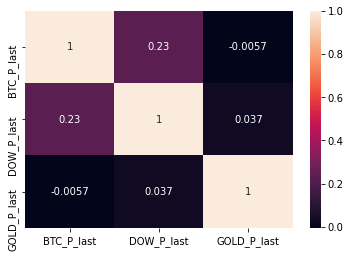

In [16]:
### LAST return CORR

import seaborn as sns
import matplotlib.pyplot as plt


df_for_cor = concatenated_prep.filter(regex='last')
correlation_mat = df_for_cor.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

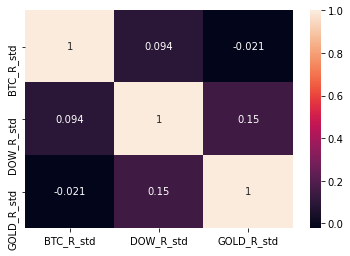

In [17]:
### vol return [on daily] CORR

import seaborn as sns
import matplotlib.pyplot as plt


df_for_cor = concatenated_prep.filter(regex='std')
correlation_mat = df_for_cor.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

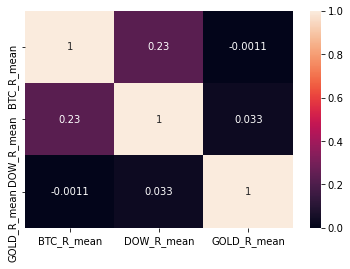

In [18]:
### avg daily return on month: CORR

import seaborn as sns
import matplotlib.pyplot as plt


df_for_cor = concatenated_prep.filter(regex='mean')
correlation_mat = df_for_cor.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [19]:
# Bitcoin and Dow are somehow high correlated \\



In [20]:
# regression on error term

In [21]:
from statsmodels.regression.linear_model import OLS

In [22]:
model_df= concatenated_prep.dropna()

In [23]:
ols_1 = OLS(model_df.filter(regex='last').filter(regex='BTC') , model_df.filter(regex='last').filter(regex='DOW'))
results_1 = ols_1.fit()

In [24]:
print(results_1.summary())

                                 OLS Regression Results                                
Dep. Variable:             BTC_P_last   R-squared (uncentered):                   0.081
Model:                            OLS   Adj. R-squared (uncentered):              0.074
Method:                 Least Squares   F-statistic:                              11.26
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                     0.00104
Time:                        16:13:37   Log-Likelihood:                         -39.985
No. Observations:                 129   AIC:                                      81.97
Df Residuals:                     128   BIC:                                      84.83
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [25]:
e_1 = model_df.filter(regex='last').filter(regex='BTC').iloc[:,0] - results_1.predict(model_df.filter(regex='last').filter(regex='DOW')) 

In [26]:

ols_1e = OLS(e_1 , model_df.filter(regex='last').filter(regex='GOLD'))
results_1e = ols_1e.fit()

In [27]:
print(results_1e.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.008
Method:                 Least Squares   F-statistic:                          2.694e-06
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                       0.999
Time:                        16:13:38   Log-Likelihood:                         -39.985
No. Observations:                 129   AIC:                                      81.97
Df Residuals:                     128   BIC:                                      84.83
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [28]:

ols_1e = OLS(e_1 ,   model_df.filter(regex='last').filter(regex='GOLD') )
results_1e = ols_1e.fit()

In [29]:
print(results_1e.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.008
Method:                 Least Squares   F-statistic:                          2.694e-06
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                       0.999
Time:                        16:13:39   Log-Likelihood:                         -39.985
No. Observations:                 129   AIC:                                      81.97
Df Residuals:                     128   BIC:                                      84.83
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [30]:
# The substition effect is not strong , the compliment effect bet dow and bitcoin is sig

In [31]:
#check bitcoin and gold , dow and gold

In [32]:
ols_2 = OLS(model_df.filter(regex='last').filter(regex='BTC') , model_df.filter(regex='last').filter(regex='GOLD'))
results_2 = ols_2.fit()
print(results_2.summary())

                                 OLS Regression Results                                
Dep. Variable:             BTC_P_last   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.008
Method:                 Least Squares   F-statistic:                            0.02582
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                       0.873
Time:                        16:13:40   Log-Likelihood:                         -45.411
No. Observations:                 129   AIC:                                      92.82
Df Residuals:                     128   BIC:                                      95.68
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [33]:
ols_2 = OLS(model_df.filter(regex='last').filter(regex='GOLD') , model_df.filter(regex='last').filter(regex='DOW'))
results_2 = ols_2.fit()
print(results_2.summary())

                                 OLS Regression Results                                
Dep. Variable:            GOLD_P_last   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):             -0.005
Method:                 Least Squares   F-statistic:                             0.3263
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                       0.569
Time:                        16:13:40   Log-Likelihood:                          208.14
No. Observations:                 129   AIC:                                     -414.3
Df Residuals:                     128   BIC:                                     -411.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [34]:
ols_3 = OLS(model_df.filter(regex='last').filter(regex='BTC') , model_df.filter(regex='last')[[i for i in model_df.filter(regex='last').columns if i not in model_df.filter(regex='last').filter(regex='BTC').columns ]])
results_3 = ols_3.fit()
print(results_3.summary())

                                 OLS Regression Results                                
Dep. Variable:             BTC_P_last   R-squared (uncentered):                   0.081
Model:                            OLS   Adj. R-squared (uncentered):              0.066
Method:                 Least Squares   F-statistic:                              5.588
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                     0.00472
Time:                        16:13:40   Log-Likelihood:                         -39.985
No. Observations:                 129   AIC:                                      83.97
Df Residuals:                     127   BIC:                                      89.69
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

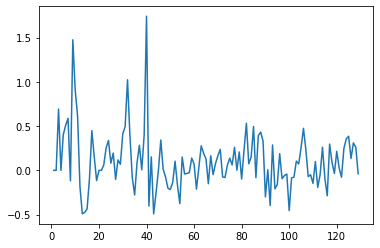

In [35]:
plt.plot(model_df.filter(regex='last').filter(regex='BTC'))

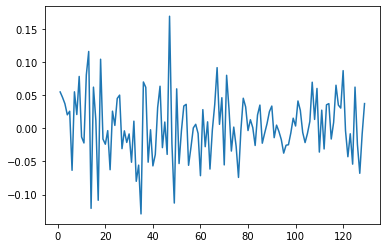

In [36]:
plt.plot(model_df.filter(regex='last').filter(regex='GOLD'))

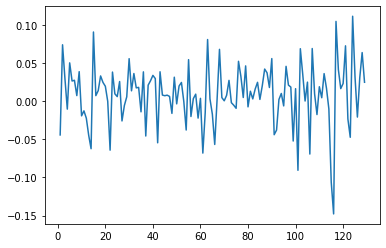

In [37]:
plt.plot(model_df.filter(regex='last').filter(regex='DOW'))

In [38]:
# DO PCA 

In [39]:
model_df.filter(regex='last')

,BTC_P_last,DOW_P_last,GOLD_P_last
1,0.000000,-0.044070,0.054829
2,0.000000,0.074383,0.046564
3,0.693147,0.030162,0.037004
4,0.000000,-0.010159,0.020350
5,0.405465,0.050622,0.025731
...,...,...,...
125,0.385027,0.032133,0.062153
126,0.134228,-0.020594,-0.023924
127,0.310522,0.031185,-0.067920
128,0.263224,0.064145,-0.008714


In [45]:
import sklearn

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
x  = model_df.filter(regex='last')
x = StandardScaler().fit_transform(x)


In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_new = pca.fit_transform(x)

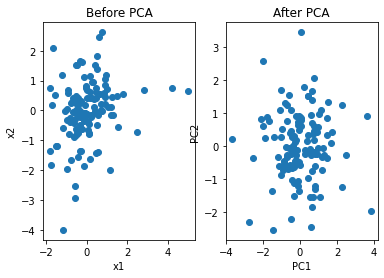

In [49]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(x[:,0], x[:,1])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(x_new[:,0], x_new[:,1] )
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [50]:
print(pca.explained_variance_ratio_)


[0.41183229 0.33391224]


In [54]:
colname_asset =[i for i in model_df.filter(regex='last').columns]

In [52]:
print(abs( pca.components_ ))

# Bitcoin and Dow tend to goes in the same direction 

[[0.69980526 0.70821805 0.09327265]
 [0.1547739  0.02285672 0.98768548]]


In [57]:
col_dat = ['BTC','DOW','GOLD']

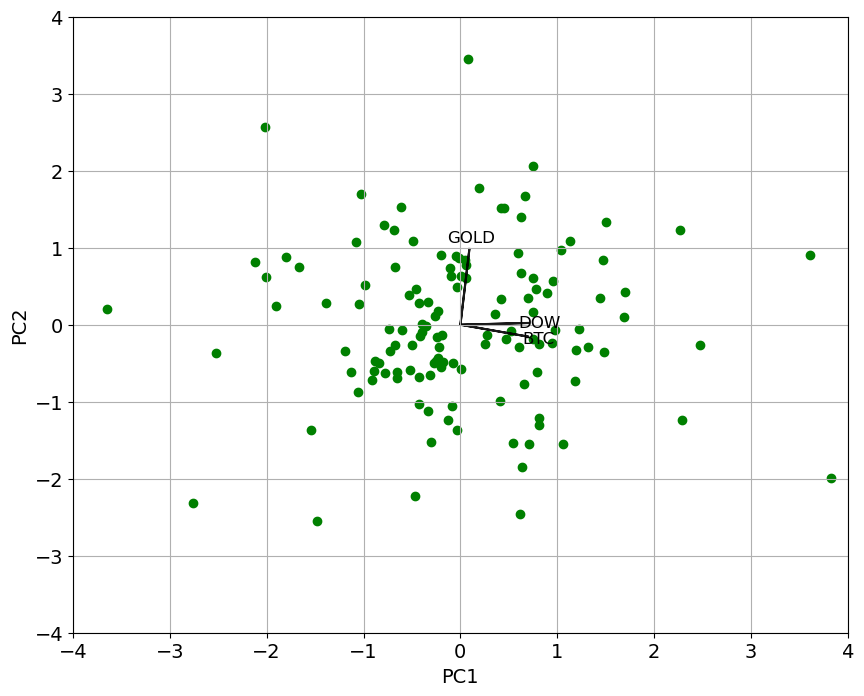

In [63]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, str(col_dat[i]), color = 'k', ha = 'center', va = 'center',fontsize=12)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(x_new[:,0:2], np.transpose(pca.components_[0:2, :]), y = "None")
plt.show()

In [64]:
# DO linear model with GOLD bitcoin DOW with lag monthly
# DO linear model with GOLD bitcoin DOW with lag weekly 
# DO linear model with GOLD bitcoin DOW with lag weekly only year 2018-202


In [65]:
agg_list_p = ["last"]
agg_list_r = ["std","mean"]



Crypto_BTC_grp = Crypto_BTC.groupby(['par_week']).agg({"Close":agg_list_p , "return":agg_list_r}).reset_index()


name_p = "BTC_P"
name_agg = ["par_week"]
for i in agg_list_p:
    name_agg.append(name_p + "_" + i)

name_r = "BTC_R"
for i in agg_list_r:
    name_agg.append(name_r + "_" + i)
    
    
Crypto_BTC_grp.columns = name_agg

In [66]:
agg_list_p = ["last"]
agg_list_r = ["std","mean"]



Alter_GOLD_grp = Alter_GOLD.groupby(['par_week']).agg({"Close":agg_list_p , "return":agg_list_r}).reset_index()


name_p = "GOLD_P"
name_agg = ["par_week"]
for i in agg_list_p:
    name_agg.append(name_p + "_" + i)

name_r = "GOLD_R"
for i in agg_list_r:
    name_agg.append(name_r + "_" + i)
    
    
Alter_GOLD_grp.columns = name_agg

In [67]:
agg_list_p = ["last"]
agg_list_r = ["std","mean"]



Stock_DJ_grp = Stock_DJ.groupby(['par_week']).agg({"Close":agg_list_p , "return":agg_list_r}).reset_index()


name_p = "DOW_P"
name_agg = ["par_week"]
for i in agg_list_p:
    name_agg.append(name_p + "_" + i)

name_r = "DOW_R"
for i in agg_list_r:
    name_agg.append(name_r + "_" + i)
    
    
Stock_DJ_grp.columns = name_agg


In [68]:
# pd.set_option("display.max_rows", 150)
prep_merge = pd.merge( Crypto_BTC_grp , 
pd.merge(Stock_DJ_grp , 
         Alter_GOLD_grp , 
         how = "left", 
         on = ["par_week"]),
         how = "left" , on = ["par_week"])

prep_merge_r = np.log(prep_merge.filter(regex='last')) - np.log(prep_merge.filter(regex='last').shift(1))

concatenated_prep = pd.concat([prep_merge[[i for i in prep_merge.columns if i not in prep_merge_r.columns]], prep_merge_r], axis=1)


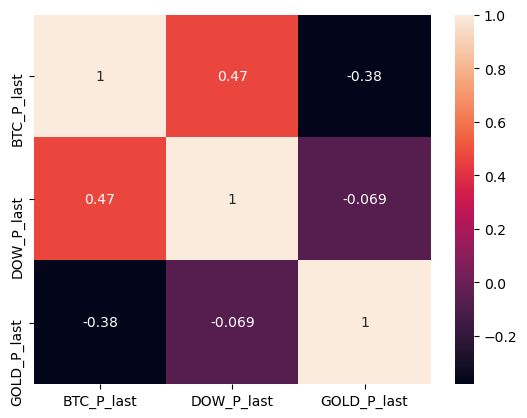

In [69]:
### LAST return CORR

import seaborn as sns
import matplotlib.pyplot as plt


df_for_cor = concatenated_prep.filter(regex='last')
correlation_mat = df_for_cor.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

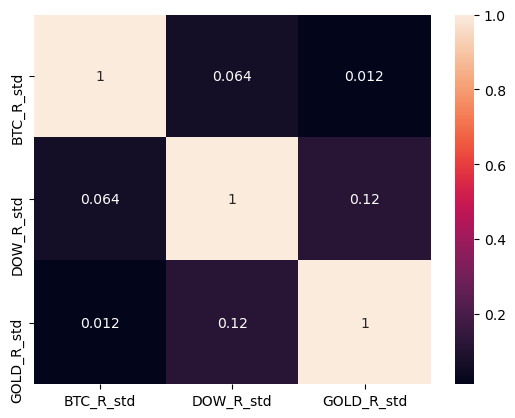

In [70]:
### vol return [on daily] CORR

import seaborn as sns
import matplotlib.pyplot as plt


df_for_cor = concatenated_prep.filter(regex='std')
correlation_mat = df_for_cor.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

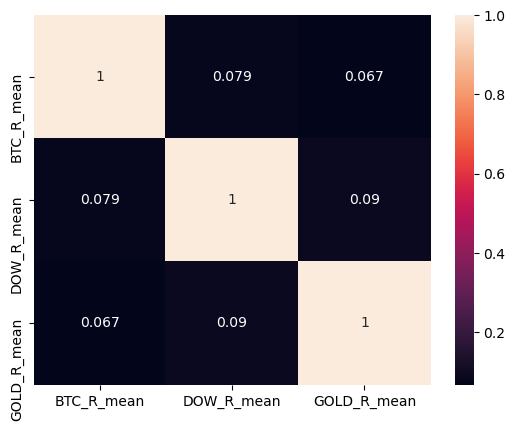

In [71]:
### avg daily return on month: CORR

import seaborn as sns
import matplotlib.pyplot as plt


df_for_cor = concatenated_prep.filter(regex='mean')
correlation_mat = df_for_cor.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [72]:
from statsmodels.regression.linear_model import OLS

In [73]:

model_df= concatenated_prep.dropna()

ols_1 = OLS(model_df.filter(regex='last').filter(regex='BTC') , model_df.filter(regex='last').filter(regex='DOW'))
results_1 = ols_1.fit()

print(results_1.summary())

                                 OLS Regression Results                                
Dep. Variable:             BTC_P_last   R-squared (uncentered):                   0.221
Model:                            OLS   Adj. R-squared (uncentered):              0.219
Method:                 Least Squares   F-statistic:                              158.1
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                    4.11e-32
Time:                        16:27:09   Log-Likelihood:                         -66.020
No. Observations:                 560   AIC:                                      134.0
Df Residuals:                     559   BIC:                                      138.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [74]:
e_1 = model_df.filter(regex='last').filter(regex='BTC').iloc[:,0] - results_1.predict(model_df.filter(regex='last').filter(regex='DOW')) 



ols_1e = OLS(e_1 , model_df.filter(regex='last').filter(regex='GOLD'))
results_1e = ols_1e.fit()


print(results_1e.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.153
Model:                            OLS   Adj. R-squared (uncentered):              0.151
Method:                 Least Squares   F-statistic:                              100.9
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                    6.09e-22
Time:                        16:27:09   Log-Likelihood:                         -19.548
No. Observations:                 560   AIC:                                      41.10
Df Residuals:                     559   BIC:                                      45.42
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [75]:
# Short term substituion is strong

In [76]:


ols_1e = OLS(  model_df.filter(regex='last').filter(regex='GOLD'),e_1   )
results_1e = ols_1e.fit()


print(results_1e.summary())

                                 OLS Regression Results                                
Dep. Variable:            GOLD_P_last   R-squared (uncentered):                   0.153
Model:                            OLS   Adj. R-squared (uncentered):              0.151
Method:                 Least Squares   F-statistic:                              100.9
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                    6.09e-22
Time:                        16:27:10   Log-Likelihood:                          1116.0
No. Observations:                 560   AIC:                                     -2230.
Df Residuals:                     559   BIC:                                     -2226.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [77]:

ols_2 = OLS(model_df.filter(regex='last').filter(regex='BTC') , model_df.filter(regex='last').filter(regex='GOLD'))
results_2 = ols_2.fit()
print(results_2.summary())

                                 OLS Regression Results                                
Dep. Variable:             BTC_P_last   R-squared (uncentered):                   0.142
Model:                            OLS   Adj. R-squared (uncentered):              0.140
Method:                 Least Squares   F-statistic:                              92.34
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                    2.46e-20
Time:                        16:27:11   Log-Likelihood:                         -92.969
No. Observations:                 560   AIC:                                      187.9
Df Residuals:                     559   BIC:                                      192.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [78]:
ols_2 = OLS(model_df.filter(regex='last').filter(regex='GOLD') , model_df.filter(regex='last').filter(regex='DOW'))
results_2 = ols_2.fit()
print(results_2.summary())


                                 OLS Regression Results                                
Dep. Variable:            GOLD_P_last   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              2.488
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                       0.115
Time:                        16:27:11   Log-Likelihood:                          1070.7
No. Observations:                 560   AIC:                                     -2139.
Df Residuals:                     559   BIC:                                     -2135.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [79]:

ols_3 = OLS(model_df.filter(regex='last').filter(regex='BTC') , model_df.filter(regex='last')[[i for i in model_df.filter(regex='last').columns if i not in model_df.filter(regex='last').filter(regex='BTC').columns ]])
results_3 = ols_3.fit()
print(results_3.summary())

                                 OLS Regression Results                                
Dep. Variable:             BTC_P_last   R-squared (uncentered):                   0.340
Model:                            OLS   Adj. R-squared (uncentered):              0.338
Method:                 Least Squares   F-statistic:                              143.9
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                    4.03e-51
Time:                        16:27:11   Log-Likelihood:                         -19.323
No. Observations:                 560   AIC:                                      42.65
Df Residuals:                     558   BIC:                                      51.30
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [80]:
model_df.filter(regex='last')


,BTC_P_last,DOW_P_last,GOLD_P_last
1,0.000000,0.031843,-0.000253
2,0.000000,0.003956,-0.005065
3,0.000000,0.017768,0.018197
4,0.000000,-0.033444,0.009511
5,0.000000,-0.008728,0.010073
...,...,...,...
559,-0.028612,0.013544,-0.005412
560,0.042734,0.002426,-0.003354
561,0.030106,0.019339,0.009684
562,-0.064946,0.011767,0.020272


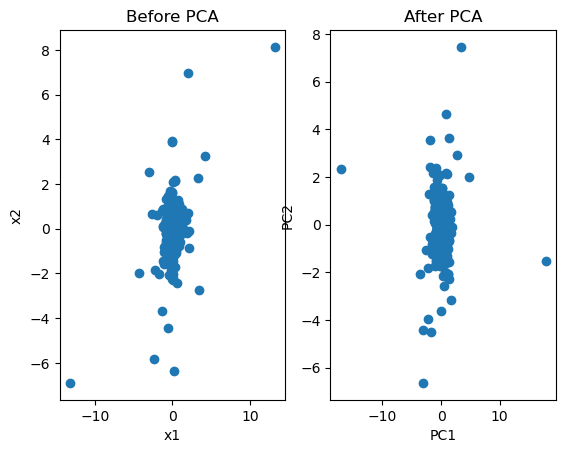

In [81]:




from sklearn.preprocessing import StandardScaler


x  = model_df.filter(regex='last')
x = StandardScaler().fit_transform(x)


from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_new = pca.fit_transform(x)


fig, axes = plt.subplots(1,2)
axes[0].scatter(x[:,0], x[:,1])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(x_new[:,0], x_new[:,1] )
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()


In [82]:


print(pca.explained_variance_ratio_)


[0.54520617 0.31114504 0.14364879]


In [83]:


model_df.filter(regex='last').columns




Index(['BTC_P_last', 'DOW_P_last', 'GOLD_P_last'], dtype='object')

In [84]:

print(abs( pca.components_ ))


[[0.68712243 0.5546706  0.46925824]
 [0.02373423 0.62839807 0.77752978]
 [0.72615388 0.54539563 0.41862173]]


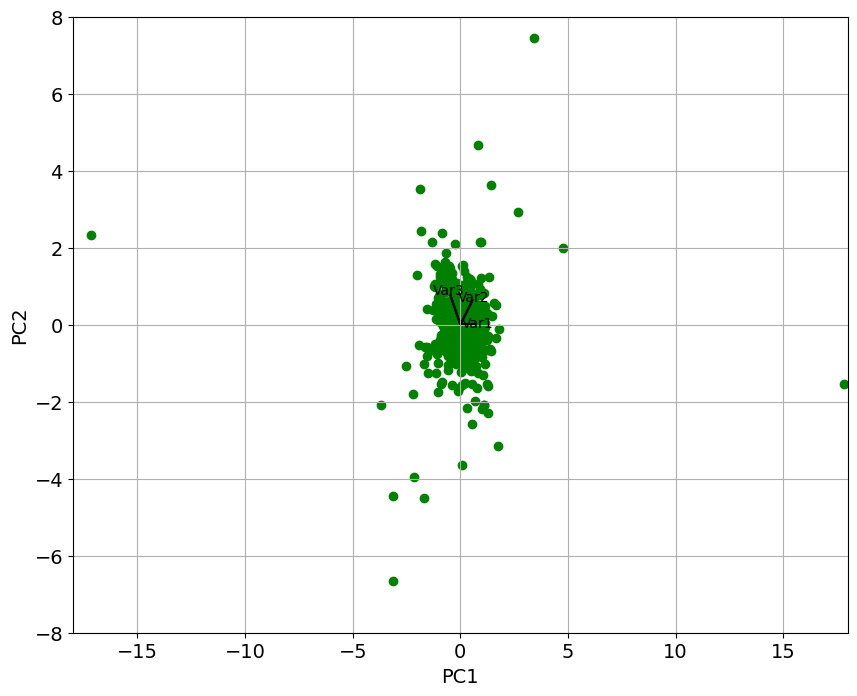

In [85]:



def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(x_new[:,0:2], np.transpose(pca.components_[0:2, :]), y = "None")
plt.show()



In [86]:
# With delete outlier 

In [90]:
model_df_del_outlier = 


BTC_P_last	DOW_P_last	GOLD_P_last

SyntaxError: invalid syntax (<ipython-input-90-fbffe9181c87>, line 1)

In [91]:
model_df['BTC_P_last'].max()

4.0967049583736

In [92]:
model_df.describe()

,par_week,BTC_R_std,BTC_R_mean,DOW_R_std,DOW_R_mean,GOLD_R_std,GOLD_R_mean,BTC_P_last,DOW_P_last,GOLD_P_last
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,201569.450000,0.042870,0.003417,0.008060,0.000444,0.011706,0.000209,0.024091,0.002162,0.000650
std,312.588245,0.053563,0.020964,0.007412,0.004816,0.010024,0.005641,0.307694,0.030219,0.035864
min,201029.000000,0.000000,-0.112645,0.000399,-0.037996,0.000721,-0.020263,-4.045785,-0.206163,-0.319837
25%,201312.750000,0.017805,-0.004281,0.003874,-0.001531,0.005667,-0.002890,-0.031941,-0.008246,-0.015013
50%,201549.500000,0.029318,0.002300,0.006282,0.000701,0.008537,0.000285,0.014587,0.003130,0.001122
75%,201833.250000,0.047868,0.011251,0.009931,0.002808,0.013581,0.003029,0.078754,0.013797,0.015509
max,202116.000000,0.648919,0.099021,0.085420,0.029818,0.078691,0.024421,4.096705,0.247818,0.322914


In [93]:
4.096705

4.096705

In [94]:
np.percentile(model_df['BTC_P_last'], 99)

0.6561803149490146

In [95]:
np.percentile(model_df['DOW_P_last'], 99)

0.07349331529141809

In [96]:
np.percentile(model_df['GOLD_P_last'], 99)

0.09623386689719447

In [97]:
model_df_del_outline = model_df[    (abs(model_df['BTC_P_last']) 
         < abs(np.percentile(model_df['BTC_P_last'], 99))   )     
        &
         (
             abs(model_df['DOW_P_last']) 
         < abs(np.percentile(model_df['DOW_P_last'], 99))
         )
         &
         (
         abs(model_df['DOW_P_last']) 
         < abs(np.percentile(model_df['GOLD_P_last'], 99))
         )
        
        
        ]



In [98]:
model_df_del_outline.describe()

,par_week,BTC_R_std,BTC_R_mean,DOW_R_std,DOW_R_mean,GOLD_R_std,GOLD_R_mean,BTC_P_last,DOW_P_last,GOLD_P_last
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000
mean,201568.348708,0.041822,0.003413,0.007663,0.000477,0.011538,0.000174,0.023637,0.002336,0.000504
std,311.035487,0.052803,0.019518,0.005513,0.003996,0.009954,0.005502,0.136809,0.019295,0.028069
min,201029.000000,0.000000,-0.084234,0.000399,-0.014230,0.000721,-0.020263,-0.589637,-0.071149,-0.107680
25%,201314.250000,0.017222,-0.004058,0.003809,-0.001515,0.005593,-0.002848,-0.028408,-0.007457,-0.014291
50%,201549.500000,0.028587,0.002274,0.006282,0.000672,0.008372,0.000250,0.014587,0.003195,0.001122
75%,201830.750000,0.047280,0.011159,0.009896,0.002770,0.013471,0.002999,0.077017,0.013447,0.014649
max,202116.000000,0.648919,0.089801,0.046362,0.013555,0.078691,0.024421,0.628609,0.067776,0.122104


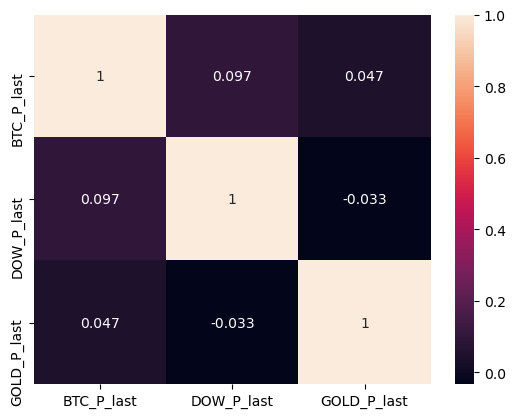

In [99]:
### LAST return CORR

import seaborn as sns
import matplotlib.pyplot as plt


df_for_cor = model_df_del_outline.filter(regex='last')
correlation_mat = df_for_cor.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

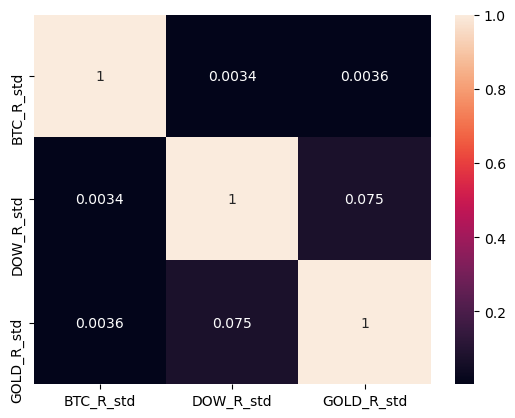

In [100]:
### vol return [on daily] CORR

import seaborn as sns
import matplotlib.pyplot as plt


df_for_cor = model_df_del_outline.filter(regex='std')
correlation_mat = df_for_cor.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [101]:
ols_2 = OLS(model_df_del_outline.filter(regex='last').filter(regex='GOLD') , model_df_del_outline.filter(regex='last').filter(regex='DOW'))
results_2 = ols_2.fit()
print(results_2.summary())

                                 OLS Regression Results                                
Dep. Variable:            GOLD_P_last   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.5227
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                       0.470
Time:                        16:27:23   Log-Likelihood:                          1168.2
No. Observations:                 542   AIC:                                     -2334.
Df Residuals:                     541   BIC:                                     -2330.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [102]:
from statsmodels.regression.linear_model import OLS


model_df_del_outline= concatenated_prep.dropna()

ols_1 = OLS(model_df_del_outline.filter(regex='last').filter(regex='BTC') , model_df_del_outline.filter(regex='last').filter(regex='DOW'))
results_1 = ols_1.fit()



print(results_1.summary())


                                 OLS Regression Results                                
Dep. Variable:             BTC_P_last   R-squared (uncentered):                   0.221
Model:                            OLS   Adj. R-squared (uncentered):              0.219
Method:                 Least Squares   F-statistic:                              158.1
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                    4.11e-32
Time:                        16:27:23   Log-Likelihood:                         -66.020
No. Observations:                 560   AIC:                                      134.0
Df Residuals:                     559   BIC:                                      138.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [103]:
e_1 = model_df_del_outline.filter(regex='last').filter(regex='BTC').iloc[:,0] - results_1.predict(model_df_del_outline.filter(regex='last').filter(regex='DOW')) 



ols_1e = OLS(e_1 , model_df_del_outline.filter(regex='last').filter(regex='GOLD'))
results_1e = ols_1e.fit()


print(results_1e.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.153
Model:                            OLS   Adj. R-squared (uncentered):              0.151
Method:                 Least Squares   F-statistic:                              100.9
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                    6.09e-22
Time:                        16:27:23   Log-Likelihood:                         -19.548
No. Observations:                 560   AIC:                                      41.10
Df Residuals:                     559   BIC:                                      45.42
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [104]:

ols_1e = OLS(e_1 ,   model_df_del_outline.filter(regex='last').filter(regex='GOLD') )
results_1e = ols_1e.fit()


print(results_1e.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.153
Model:                            OLS   Adj. R-squared (uncentered):              0.151
Method:                 Least Squares   F-statistic:                              100.9
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                    6.09e-22
Time:                        16:27:23   Log-Likelihood:                         -19.548
No. Observations:                 560   AIC:                                      41.10
Df Residuals:                     559   BIC:                                      45.42
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [105]:

ols_2 = OLS(model_df_del_outline.filter(regex='last').filter(regex='BTC') , model_df_del_outline.filter(regex='last').filter(regex='GOLD'))
results_2 = ols_2.fit()
print(results_2.summary())


                                 OLS Regression Results                                
Dep. Variable:             BTC_P_last   R-squared (uncentered):                   0.142
Model:                            OLS   Adj. R-squared (uncentered):              0.140
Method:                 Least Squares   F-statistic:                              92.34
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                    2.46e-20
Time:                        16:27:23   Log-Likelihood:                         -92.969
No. Observations:                 560   AIC:                                      187.9
Df Residuals:                     559   BIC:                                      192.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [106]:

ols_2 = OLS(model_df_del_outline.filter(regex='last').filter(regex='GOLD') , model_df_del_outline.filter(regex='last').filter(regex='DOW'))
results_2 = ols_2.fit()
print(results_2.summary())

                                 OLS Regression Results                                
Dep. Variable:            GOLD_P_last   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              2.488
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                       0.115
Time:                        16:27:23   Log-Likelihood:                          1070.7
No. Observations:                 560   AIC:                                     -2139.
Df Residuals:                     559   BIC:                                     -2135.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [107]:
ols_3 = OLS(model_df_del_outline.filter(regex='last').filter(regex='BTC') , model_df_del_outline.filter(regex='last')[[i for i in model_df_del_outline.filter(regex='last').columns if i not in model_df_del_outline.filter(regex='last').filter(regex='BTC').columns ]])
results_3 = ols_3.fit()
print(results_3.summary())


                                 OLS Regression Results                                
Dep. Variable:             BTC_P_last   R-squared (uncentered):                   0.340
Model:                            OLS   Adj. R-squared (uncentered):              0.338
Method:                 Least Squares   F-statistic:                              143.9
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                    4.03e-51
Time:                        16:27:24   Log-Likelihood:                         -19.323
No. Observations:                 560   AIC:                                      42.65
Df Residuals:                     558   BIC:                                      51.30
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [108]:
model_df_del_outline.describe()

,par_week,BTC_R_std,BTC_R_mean,DOW_R_std,DOW_R_mean,GOLD_R_std,GOLD_R_mean,BTC_P_last,DOW_P_last,GOLD_P_last
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,201569.450000,0.042870,0.003417,0.008060,0.000444,0.011706,0.000209,0.024091,0.002162,0.000650
std,312.588245,0.053563,0.020964,0.007412,0.004816,0.010024,0.005641,0.307694,0.030219,0.035864
min,201029.000000,0.000000,-0.112645,0.000399,-0.037996,0.000721,-0.020263,-4.045785,-0.206163,-0.319837
25%,201312.750000,0.017805,-0.004281,0.003874,-0.001531,0.005667,-0.002890,-0.031941,-0.008246,-0.015013
50%,201549.500000,0.029318,0.002300,0.006282,0.000701,0.008537,0.000285,0.014587,0.003130,0.001122
75%,201833.250000,0.047868,0.011251,0.009931,0.002808,0.013581,0.003029,0.078754,0.013797,0.015509
max,202116.000000,0.648919,0.099021,0.085420,0.029818,0.078691,0.024421,4.096705,0.247818,0.322914


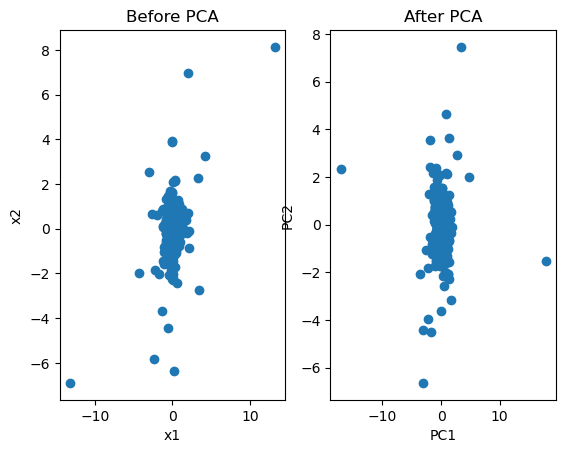

In [109]:


model_df_del_outline.filter(regex='last')



from sklearn.preprocessing import StandardScaler


x  = model_df_del_outline.filter(regex='last')
x = StandardScaler().fit_transform(x)


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_new = pca.fit_transform(x)


fig, axes = plt.subplots(1,2)
axes[0].scatter(x[:,0], x[:,1])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(x_new[:,0], x_new[:,1] )
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [110]:

print(pca.explained_variance_ratio_)



model_df_del_outline.filter(regex='last').columns



[0.54520617 0.31114504]


Index(['BTC_P_last', 'DOW_P_last', 'GOLD_P_last'], dtype='object')

In [111]:
model_df_del_outline.describe()

,par_week,BTC_R_std,BTC_R_mean,DOW_R_std,DOW_R_mean,GOLD_R_std,GOLD_R_mean,BTC_P_last,DOW_P_last,GOLD_P_last
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,201569.450000,0.042870,0.003417,0.008060,0.000444,0.011706,0.000209,0.024091,0.002162,0.000650
std,312.588245,0.053563,0.020964,0.007412,0.004816,0.010024,0.005641,0.307694,0.030219,0.035864
min,201029.000000,0.000000,-0.112645,0.000399,-0.037996,0.000721,-0.020263,-4.045785,-0.206163,-0.319837
25%,201312.750000,0.017805,-0.004281,0.003874,-0.001531,0.005667,-0.002890,-0.031941,-0.008246,-0.015013
50%,201549.500000,0.029318,0.002300,0.006282,0.000701,0.008537,0.000285,0.014587,0.003130,0.001122
75%,201833.250000,0.047868,0.011251,0.009931,0.002808,0.013581,0.003029,0.078754,0.013797,0.015509
max,202116.000000,0.648919,0.099021,0.085420,0.029818,0.078691,0.024421,4.096705,0.247818,0.322914


In [112]:


print(abs( pca.components_ ))




[[0.68712243 0.5546706  0.46925824]
 [0.02373423 0.62839807 0.77752978]]


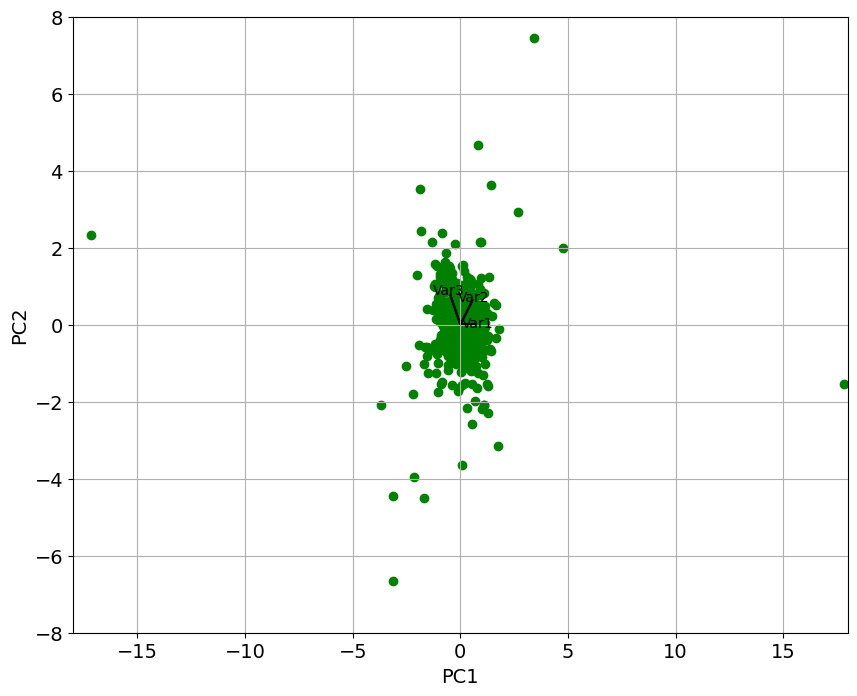

In [113]:

def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(x_new[:,0:2], np.transpose(pca.components_[0:2, :]), y = "None")
plt.show()

In [114]:
# weekly with lag

In [115]:
model_df['BTC_P_last_l1'] = model_df['BTC_P_last'].shift(1)
model_df['BTC_P_last_l2']= model_df['BTC_P_last'].shift(2)
model_df['BTC_P_last_l3']= model_df['BTC_P_last'].shift(3)
model_df['BTC_P_last_l4']= model_df['BTC_P_last'].shift(4)


model_df['DOW_P_last_l1']= model_df['DOW_P_last'].shift(1)
model_df['DOW_P_last_l2']= model_df['DOW_P_last'].shift(2)
model_df['DOW_P_last_l3']= model_df['DOW_P_last'].shift(3)
model_df['DOW_P_last_l4']= model_df['DOW_P_last'].shift(4)

model_df['GOLD_P_last_l1']= model_df['GOLD_P_last'].shift(1)
model_df['GOLD_P_last_l2']= model_df['GOLD_P_last'].shift(2)
model_df['GOLD_P_last_l3']= model_df['GOLD_P_last'].shift(3)
model_df['GOLD_P_last_l4']= model_df['GOLD_P_last'].shift(4)

C:\Users\wann\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\wann\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wann\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [116]:
model_df2 = model_df.dropna()

In [117]:
# without delete outlier 

In [118]:
ols_3 = OLS(model_df2['BTC_P_last'] , model_df2.filter(regex='last')[[i for i in model_df2.filter(regex='last').columns if i not in model_df2.filter(regex='last').filter(regex='BTC').columns ]])
results_3 = ols_3.fit()
print(results_3.summary())

                                 OLS Regression Results                                
Dep. Variable:             BTC_P_last   R-squared (uncentered):                   0.357
Model:                            OLS   Adj. R-squared (uncentered):              0.346
Method:                 Least Squares   F-statistic:                              30.35
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                    1.56e-46
Time:                        16:27:27   Log-Likelihood:                         -13.907
No. Observations:                 556   AIC:                                      47.81
Df Residuals:                     546   BIC:                                      91.02
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [119]:
#version 1 2017 until now

In [120]:
model_df3 = model_df[model_df["par_week"] > 201700].dropna()

In [121]:
ols_3 = OLS(model_df3['BTC_P_last'] , model_df3.filter(regex='last')[[i for i in model_df3.filter(regex='last').columns if i not in model_df3.filter(regex='last').filter(regex='BTC').columns ]])
results_3 = ols_3.fit()
print(results_3.summary())

                                 OLS Regression Results                                
Dep. Variable:             BTC_P_last   R-squared (uncentered):                   0.209
Model:                            OLS   Adj. R-squared (uncentered):              0.172
Method:                 Least Squares   F-statistic:                              5.652
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                    1.70e-07
Time:                        16:27:28   Log-Likelihood:                          89.318
No. Observations:                 224   AIC:                                     -158.6
Df Residuals:                     214   BIC:                                     -124.5
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [122]:
model_df3

,par_week,BTC_R_std,BTC_R_mean,DOW_R_std,DOW_R_mean,GOLD_R_std,GOLD_R_mean,BTC_P_last,DOW_P_last,GOLD_P_last,...,BTC_P_last_l3,BTC_P_last_l4,DOW_P_last_l1,DOW_P_last_l2,DOW_P_last_l3,DOW_P_last_l4,GOLD_P_last_l1,GOLD_P_last_l2,GOLD_P_last_l3,GOLD_P_last_l4
340,201702,0.057780,-0.013233,0.003499,-0.000784,0.027631,-0.007097,-0.092628,-0.003918,-0.042584,...,0.027107,0.001955,-0.008626,0.004545,0.004372,0.030132,0.084033,-0.072956,-0.012292,-0.005165
341,201703,0.036165,0.016043,0.003841,-0.000736,0.034816,0.013783,0.112302,-0.002945,0.068913,...,0.121690,0.027107,-0.003918,-0.008626,0.004545,0.004372,-0.042584,0.084033,-0.072956,-0.012292
342,201704,0.015877,-0.000670,0.003938,0.002671,0.006644,-0.002733,-0.004691,0.013353,-0.013667,...,0.078012,0.121690,-0.002945,-0.003918,-0.008626,0.004545,0.068913,-0.042584,0.084033,-0.072956
343,201705,0.018906,0.015050,0.006230,-0.000222,0.005551,0.004740,0.105350,-0.001111,0.023701,...,-0.092628,0.078012,0.013353,-0.002945,-0.003918,-0.008626,-0.013667,0.068913,-0.042584,0.084033
344,201706,0.033892,-0.002783,0.003386,0.001962,0.004103,0.001880,-0.019478,0.009812,0.009401,...,0.112302,-0.092628,-0.001111,0.013353,-0.002945,-0.003918,0.023701,-0.013667,0.068913,-0.042584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,202112,0.041489,-0.004087,0.008527,0.002709,0.005386,-0.001082,-0.028612,0.013544,-0.005412,...,0.121178,-0.240333,-0.004607,0.039907,0.018067,-0.018004,0.012654,0.012462,-0.017682,-0.027724
560,202113,0.021225,0.006105,0.004121,0.000606,0.016078,-0.000838,0.042734,0.002426,-0.003354,...,0.147984,0.121178,0.013544,-0.004607,0.039907,0.018067,-0.005412,0.012654,0.012462,-0.017682
561,202114,0.025202,0.004301,0.005926,0.003868,0.007117,0.001937,0.030106,0.019339,0.009684,...,-0.029701,0.147984,0.002426,0.013544,-0.004607,0.039907,-0.003354,-0.005412,0.012654,0.012462
562,202115,0.038205,-0.009278,0.004636,0.002353,0.010554,0.004054,-0.064946,0.011767,0.020272,...,-0.028612,-0.029701,0.019339,0.002426,0.013544,-0.004607,0.009684,-0.003354,-0.005412,0.012654


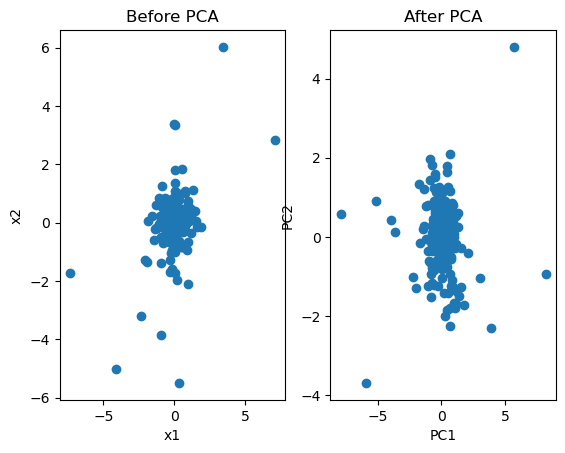

In [123]:




from sklearn.preprocessing import StandardScaler


x  = model_df3.filter(regex='last')[['BTC_P_last','DOW_P_last','GOLD_P_last']]
x = StandardScaler().fit_transform(x)


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_new = pca.fit_transform(x)


fig, axes = plt.subplots(1,2)
axes[0].scatter(x[:,0], x[:,1])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(x_new[:,0], x_new[:,1] )
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

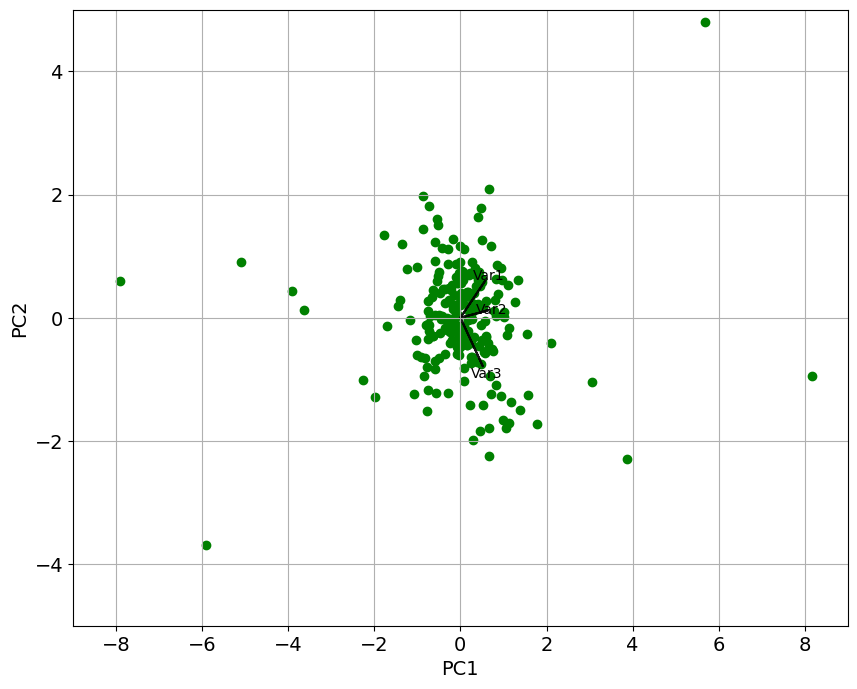

In [124]:

def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(x_new[:,0:2], np.transpose(pca.components_[0:2, :]), y = "None")
plt.show()

In [125]:
# Without outlier

In [126]:
model_df3_del_outline = model_df3[    (abs(model_df3['BTC_P_last']) 
         < abs(np.percentile(model_df3['BTC_P_last'], 99))   )     
        &
         (
             abs(model_df3['DOW_P_last']) 
         < abs(np.percentile(model_df3['DOW_P_last'], 99))
         )
         &
         (
         abs(model_df3['DOW_P_last']) 
         < abs(np.percentile(model_df3['GOLD_P_last'], 99))
         )
        
        
        ]


In [127]:
ols_3 = OLS(model_df3_del_outline['BTC_P_last'] , model_df3_del_outline.filter(regex='last')[[i for i in model_df3_del_outline.filter(regex='last').columns if i not in model_df3_del_outline.filter(regex='last').filter(regex='BTC').columns ]])
results_3 = ols_3.fit()
print(results_3.summary())

                                 OLS Regression Results                                
Dep. Variable:             BTC_P_last   R-squared (uncentered):                   0.046
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.9802
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                       0.462
Time:                        16:27:30   Log-Likelihood:                          170.24
No. Observations:                 213   AIC:                                     -320.5
Df Residuals:                     203   BIC:                                     -286.9
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

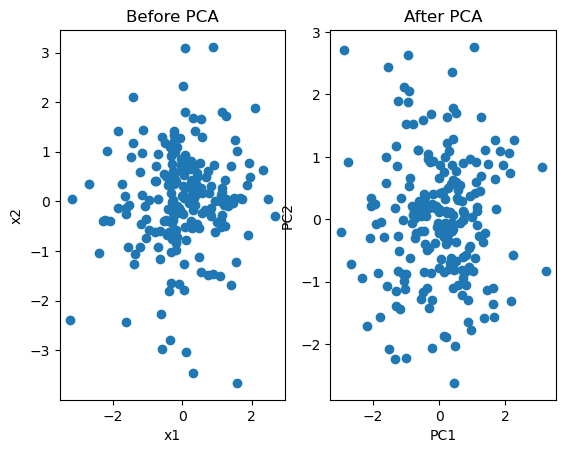

In [128]:



from sklearn.preprocessing import StandardScaler


x  = model_df3_del_outline.filter(regex='last')[['BTC_P_last','DOW_P_last','GOLD_P_last']]
x = StandardScaler().fit_transform(x)


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_new = pca.fit_transform(x)


fig, axes = plt.subplots(1,2)
axes[0].scatter(x[:,0], x[:,1])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(x_new[:,0], x_new[:,1] )
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

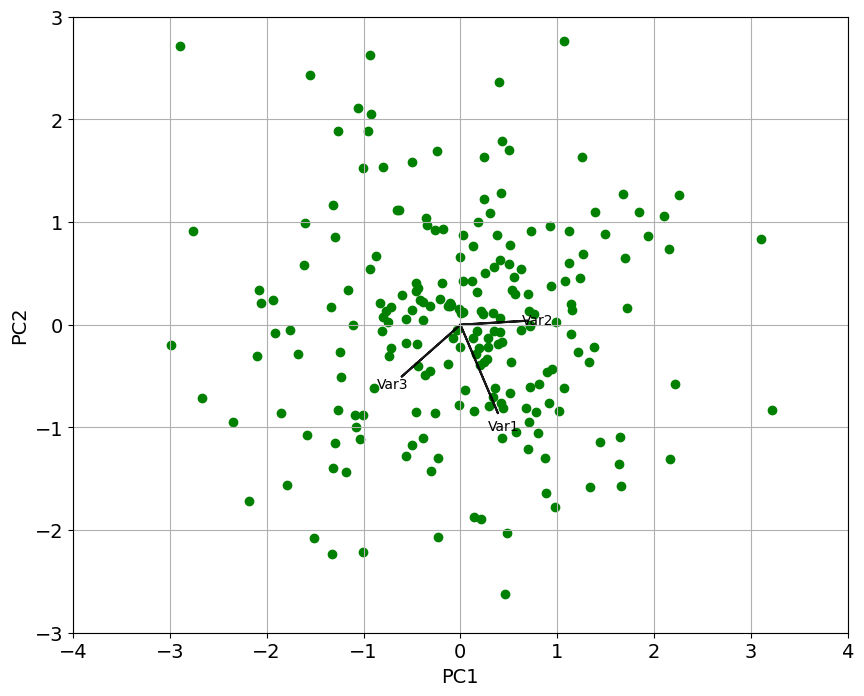

In [129]:

def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(x_new[:,0:2], np.transpose(pca.components_[0:2, :]), y = "None")
plt.show()

# DONE VERSION 1 

# Version 2 

In [380]:
# Crypto

# Bitcoin
# Ethereum
# Binance Coin
# Tether
# Polkadot
# Cardano

# XRP
# Uniswap
# Litecoin
# Chainlink
# THETA
# Filecoin
# USD Coin
# Bitcoin Cash
# Stellar
# BitTorrent
# TRON
# Wrapped Bitcoin
# Dogecoin




RuntimeError: ERR#0085: crypto currency: klay, not found, check if it is correct.

In [381]:
Crypto_BTC = investpy.get_crypto_historical_data(crypto='bitcoin', from_date='01/01/1990', to_date='01/01/2022')
Crypto_ETH = investpy.get_crypto_historical_data(crypto='Ethereum', from_date='01/01/1990', to_date='01/01/2022')
Crypto_BNB = investpy.get_crypto_historical_data(crypto='Binance Coin', from_date='01/01/1990', to_date='01/01/2022')
Crypto_USDT = investpy.get_crypto_historical_data(crypto='Tether', from_date='01/01/1990', to_date='01/01/2022')
Crypto_DOT = investpy.get_crypto_historical_data(crypto='Polkadot', from_date='01/01/1990', to_date='01/01/2022')
Crypto_ADA = investpy.get_crypto_historical_data(crypto='Cardano', from_date='01/01/1990', to_date='01/01/2022')
Crypto_XRP = investpy.get_crypto_historical_data(crypto='XRP', from_date='01/01/1990', to_date='01/01/2022')
Crypto_UNI = investpy.get_crypto_historical_data(crypto='Uniswap', from_date='01/01/1990', to_date='01/01/2022')
Crypto_LTC = investpy.get_crypto_historical_data(crypto='Litecoin', from_date='01/01/1990', to_date='01/01/2022')
Crypto_LINK = investpy.get_crypto_historical_data(crypto='Chainlink', from_date='01/01/1990', to_date='01/01/2022')
Crypto_THETA = investpy.get_crypto_historical_data(crypto='THETA', from_date='01/01/1990', to_date='01/01/2022')
Crypto_FIL = investpy.get_crypto_historical_data(crypto='Filecoin', from_date='01/01/1990', to_date='01/01/2022')
Crypto_USDC = investpy.get_crypto_historical_data(crypto='USD Coin', from_date='01/01/1990', to_date='01/01/2022')
Crypto_BCH = investpy.get_crypto_historical_data(crypto='Bitcoin Cash', from_date='01/01/1990', to_date='01/01/2022')
Crypto_XLM = investpy.get_crypto_historical_data(crypto='Stellar', from_date='01/01/1990', to_date='01/01/2022')
Crypto_BTT = investpy.get_crypto_historical_data(crypto='BitTorrent', from_date='01/01/1990', to_date='01/01/2022')
Crypto_TRX = investpy.get_crypto_historical_data(crypto='TRON', from_date='01/01/1990', to_date='01/01/2022')
Crypto_WBTC = investpy.get_crypto_historical_data(crypto='Wrapped Bitcoin', from_date='01/01/1990', to_date='01/01/2022')
Crypto_DOGE = investpy.get_crypto_historical_data(crypto='Dogecoin', from_date='01/01/1990', to_date='01/01/2022')


In [423]:
print( " BTC " ,np.min(Crypto_BTC.index) )
print( " ETH " ,np.min(Crypto_ETH.index) )
print( " BNB " ,np.min(Crypto_BNB.index) )
print( " USDT " ,np.min(Crypto_USDT.index) )
print( " DOT " ,np.min(Crypto_DOT.index) )
print( " ADA " ,np.min(Crypto_ADA.index) )
print( " XRP " ,np.min(Crypto_XRP.index) )
print( " UNI " ,np.min(Crypto_UNI.index) )
print( " LTC " ,np.min(Crypto_LTC.index) )
print( " LINK " ,np.min(Crypto_LINK.index) )
print( " THETA " ,np.min(Crypto_THETA.index) )
print( " FIL " ,np.min(Crypto_FIL.index) )
print( " USDC " ,np.min(Crypto_USDC.index) )
print( " BCH " ,np.min(Crypto_BCH.index) )
print( " XLM " ,np.min(Crypto_XLM.index) )
print( " BTT " ,np.min(Crypto_BTT.index) )
print( " TRX " ,np.min(Crypto_TRX.index) )
print( " WBTC " ,np.min(Crypto_WBTC.index) )
print( " DOGE " ,np.min(Crypto_DOGE.index) )

 BTC  2010-07-18 00:00:00
 ETH  2016-03-10 00:00:00
 BNB  2017-11-09 00:00:00
 USDT  2017-04-14 00:00:00
 DOT  2020-08-21 00:00:00
 ADA  2017-12-31 00:00:00
 XRP  2015-01-22 00:00:00
 UNI  2020-11-06 00:00:00
 LTC  2016-08-24 00:00:00
 LINK  2018-02-02 00:00:00
 THETA  2018-02-07 00:00:00
 FIL  2018-01-30 00:00:00
 USDC  2018-12-06 00:00:00
 BCH  2017-08-03 00:00:00
 XLM  2017-02-22 00:00:00
 BTT  2019-06-27 00:00:00
 TRX  2017-11-14 00:00:00
 WBTC  2020-11-18 00:00:00
 DOGE  2017-06-03 00:00:00


In [ ]:

## Stock Indice
####  US
# * Dow 30
# * S&P 500

# ####  United Kingdom
# * FTSE 100


# #### Australia
# * S&P/ASX 200

# #### Canada
# * S&P/TSX





# #### China
# * CSI 1000 ## cant find
# * Shanghai

# #### France
# * CAC 40
# * CAC All Shares


# #### Germany
# * DAX
# * Euro Stoxx 50

# #### Hong Kong
# * FTSE China 50 # idnot use
# * Hang Seng

# #### India
# * BSE Sensex
# * Nifty 50

# #### Japan
# * Nikkei 225

# #### South Korea
# * KOSPI

# #### Switzerland
# * SMI 

# #### Thailand
# * SET


In [398]:
stock_dow = investpy.indices.get_index_historical_data(index = "DOW 30", country = "United States", from_date='01/01/1990',  to_date='01/01/2022')
stock_sp500 = investpy.indices.get_index_historical_data(index = "S&P 500", country = "United States", from_date='01/01/1990',  to_date='01/01/2022')
stock_ftse100 = investpy.indices.get_index_historical_data(index = "FTSE 100", country = "United Kingdom", from_date='01/01/1990',  to_date='01/01/2022')
stock_spasx200 = investpy.indices.get_index_historical_data(index = "S&P/ASX 200", country = "Australia", from_date='01/01/1990',  to_date='01/01/2022')
stock_sptsx = investpy.indices.get_index_historical_data(index = "S&P/TSX", country = "Canada", from_date='01/01/1990',  to_date='01/01/2022')
stock_shai = investpy.indices.get_index_historical_data(index = "Shanghai", country = "China", from_date='01/01/1990',  to_date='01/01/2022')
stock_cac40 = investpy.indices.get_index_historical_data(index = "CAC 40", country = "France", from_date='01/01/1990',  to_date='01/01/2022')
stock_dax = investpy.indices.get_index_historical_data(index = "DAX", country = "Germany", from_date='01/01/1990',  to_date='01/01/2022')
stock_hs = investpy.indices.get_index_historical_data(index = "Hang Seng", country = "Hong Kong", from_date='01/01/1990',  to_date='01/01/2022')
stock_nfty = investpy.indices.get_index_historical_data(index = "Nifty 50", country = "India", from_date='01/01/1990',  to_date='01/01/2022')
stock_nikkei = investpy.indices.get_index_historical_data(index = "Nikkei 225", country = "Japan", from_date='01/01/1990',  to_date='01/01/2022')
stock_kospi = investpy.indices.get_index_historical_data(index = "KOSPI", country = "South Korea", from_date='01/01/1990',  to_date='01/01/2022')
stock_smi = investpy.indices.get_index_historical_data(index = "SMI", country = "Switzerland", from_date='01/01/1990',  to_date='01/01/2022')
stock_set = investpy.indices.get_index_historical_data(index = "SET", country = "Thailand", from_date='01/01/1990',  to_date='01/01/2022')



In [ ]:
# Alternative
# Gold
# silver
# Yield10 year
# Yield2 year
# Yield3 month
# agriculture price 3 product

# Inflation Bond (didnot find)
# oil wti
# unemployment rate/ GDP/ Nonfarm payroll (didnot find)
# dxy us index


In [420]:


Alter_GOLD = investpy.get_commodity_historical_data(commodity='gold', from_date='01/01/1990', to_date='01/01/2022')
Alter_SILVER = investpy.get_commodity_historical_data(commodity='silver', from_date='01/01/1990', to_date='01/01/2022')
Alter_OIL = investpy.get_commodity_historical_data(commodity='Crude Oil WTI', from_date='01/01/1990', to_date='01/01/2022')
Alter_US10Y = investpy.bonds.get_bond_historical_data(bond = "U.S. 10Y", from_date='01/01/1990', to_date='01/01/2022')
Alter_US2Y = investpy.bonds.get_bond_historical_data(bond = "U.S. 2Y", from_date='01/01/1990', to_date='01/01/2022')
Alter_US3M = investpy.bonds.get_bond_historical_data(bond = "U.S. 3M", from_date='01/01/1990', to_date='01/01/2022')
Alter_Wheat = investpy.get_commodity_historical_data(commodity='US Wheat', from_date='01/01/1990', to_date='01/01/2022')
Alter_CORN = investpy.get_commodity_historical_data(commodity='US Corn', from_date='01/01/1990', to_date='01/01/2022')
Alter_SOYBEAN = investpy.get_commodity_historical_data(commodity='US Soybeans', from_date='01/01/1990', to_date='01/01/2022')
Alter_DXY = investpy.indices.get_index_historical_data(index = "US Dollar Index", country = "United States", from_date='01/01/1990',  to_date='01/01/2022')


## Question to answer
* 1. Crypto correlation 
* 2. Crypto PCA direction
* 3. Select Unrelated Crypto 
* 4. Correlation Gold with Selected Crypto
* 5. Correlation Silver with selected Crypto
* 6. Correlation every stocks with Selected Crypto
* 7. Stock correlation 
* 8. Stock PCA direction
* 9. Regression on Y = Selected Crypto , X = Gold , Selected stocks , Z = Agriculture for control variables , Z2 = US daollar index
* 10. Correlation of below 
* 11. PCA selected Cryto [individual] , Gold ,Many stocks, Oil , Bond Yield

In [ ]:
Crypto_BTC = investpy.get_crypto_historical_data(crypto='bitcoin', from_date='01/01/1990', to_date='01/01/2022')
Crypto_ETH = investpy.get_crypto_historical_data(crypto='Ethereum', from_date='01/01/1990', to_date='01/01/2022')
Crypto_BNB = investpy.get_crypto_historical_data(crypto='Binance Coin', from_date='01/01/1990', to_date='01/01/2022')
Crypto_USDT = investpy.get_crypto_historical_data(crypto='Tether', from_date='01/01/1990', to_date='01/01/2022')
Crypto_DOT = investpy.get_crypto_historical_data(crypto='Polkadot', from_date='01/01/1990', to_date='01/01/2022')
Crypto_ADA = investpy.get_crypto_historical_data(crypto='Cardano', from_date='01/01/1990', to_date='01/01/2022')
Crypto_XRP = investpy.get_crypto_historical_data(crypto='XRP', from_date='01/01/1990', to_date='01/01/2022')
Crypto_UNI = investpy.get_crypto_historical_data(crypto='Uniswap', from_date='01/01/1990', to_date='01/01/2022')
Crypto_LTC = investpy.get_crypto_historical_data(crypto='Litecoin', from_date='01/01/1990', to_date='01/01/2022')
Crypto_LINK = investpy.get_crypto_historical_data(crypto='Chainlink', from_date='01/01/1990', to_date='01/01/2022')
Crypto_THETA = investpy.get_crypto_historical_data(crypto='THETA', from_date='01/01/1990', to_date='01/01/2022')
Crypto_FIL = investpy.get_crypto_historical_data(crypto='Filecoin', from_date='01/01/1990', to_date='01/01/2022')
Crypto_USDC = investpy.get_crypto_historical_data(crypto='USD Coin', from_date='01/01/1990', to_date='01/01/2022')
Crypto_BCH = investpy.get_crypto_historical_data(crypto='Bitcoin Cash', from_date='01/01/1990', to_date='01/01/2022')
Crypto_XLM = investpy.get_crypto_historical_data(crypto='Stellar', from_date='01/01/1990', to_date='01/01/2022')
Crypto_BTT = investpy.get_crypto_historical_data(crypto='BitTorrent', from_date='01/01/1990', to_date='01/01/2022')
Crypto_TRX = investpy.get_crypto_historical_data(crypto='TRON', from_date='01/01/1990', to_date='01/01/2022')
Crypto_WBTC = investpy.get_crypto_historical_data(crypto='Wrapped Bitcoin', from_date='01/01/1990', to_date='01/01/2022')
Crypto_DOGE = investpy.get_crypto_historical_data(crypto='Dogecoin', from_date='01/01/1990', to_date='01/01/2022')


In [ ]:
# Stock_DJ['return'] = np.log(Stock_DJ['Close']) - np.log(Stock_DJ['Close']).shift(1) 
# Crypto_BTC['return'] = np.log(Crypto_BTC['Close']) - np.log(Crypto_BTC['Close']).shift(1) 
# Alter_GOLD['return'] = np.log(Alter_GOLD['Close']) - np.log(Alter_GOLD['Close']).shift(1) 



# Alter_GOLD['date'] = Alter_GOLD.index
# Alter_GOLD['year'] = Alter_GOLD.date.dt.year.astype(int) 
# Alter_GOLD['par_month'] = (Alter_GOLD.date.dt.year.astype(str) + Alter_GOLD.date.dt.month.astype(str).str.zfill(2)).astype(int)
# Alter_GOLD['par_week'] = (Alter_GOLD.date.dt.year.astype(str) + Alter_GOLD.date.dt.isocalendar().week.astype(str).str.zfill(2)).astype(int)


# Stock_DJ['date'] = Stock_DJ.index
# Stock_DJ['year'] = Stock_DJ.date.dt.year.astype(int) 
# Stock_DJ['par_month'] = (Stock_DJ.date.dt.year.astype(str) + Stock_DJ.date.dt.month.astype(str).str.zfill(2)).astype(int)
# Stock_DJ['par_week'] = (Stock_DJ.date.dt.year.astype(str) + Stock_DJ.date.dt.isocalendar().week.astype(str).str.zfill(2)).astype(int)

# Crypto_BTC['date'] = Crypto_BTC.index
# Crypto_BTC['year'] = Crypto_BTC.date.dt.year.astype(int)
# Crypto_BTC['par_month'] = (Crypto_BTC.date.dt.year.astype(str) + Crypto_BTC.date.dt.month.astype(str).str.zfill(2)).astype(int)
# Crypto_BTC['par_week'] = (Crypto_BTC.date.dt.year.astype(str) + Crypto_BTC.date.dt.isocalendar().week.astype(str).str.zfill(2)).astype(int)


In [426]:
# PARAMETER
name_coin = "ETH"

exec("df_cryto = Crypto_{x}".format(x = name_coin))



df_cryto['return'] = np.log(df_cryto['Close']) - np.log(df_cryto['Close']).shift(1) 
df_cryto['date'] = df_cryto.index
df_cryto['year'] = df_cryto.date.dt.year.astype(int) 
df_cryto['par_month'] = (df_cryto.date.dt.year.astype(str) + df_cryto.date.dt.month.astype(str).str.zfill(2)).astype(int)
df_cryto['par_week'] = (df_cryto.date.dt.year.astype(str) + df_cryto.date.dt.isocalendar().week.astype(str).str.zfill(2)).astype(int)


agg_list_p = ["last"]
agg_list_r = ["std","mean"]

df_cryto = df_cryto.groupby(['par_month']).agg({"Close":agg_list_p , "return":agg_list_r}).reset_index()

name_p = name_coin + "_P"
name_agg = ["par_month"]
for i in agg_list_p:
    name_agg.append(name_p + "_" + i)

name_r = name_coin + "_R"
for i in agg_list_r:
    name_agg.append(name_r + "_" + i)
    
df_cryto.columns = name_agg
df_cryto

,par_month,ETH_P_last,ETH_R_std,ETH_R_mean
0,201603,11.41,0.092011,-0.001398
1,201604,8.87,0.061169,-0.008394
2,201605,14.01,0.059050,0.014745
3,201606,12.50,0.095353,-0.003801
4,201607,11.86,0.064177,-0.001695
5,201608,11.63,0.041814,-0.000632
6,201609,13.30,0.034088,0.004473
7,201610,10.96,0.029080,-0.006242
8,201611,8.62,0.026418,-0.008006
9,201612,8.00,0.051856,-0.002408


In [130]:
## ETH 

In [134]:
Crypto_BTC = investpy.get_crypto_historical_data(crypto='bitcoin', from_date='01/01/1990', to_date='01/01/2022')
Crypto_ETH = investpy.get_crypto_historical_data(crypto='Ethereum', from_date='01/01/1990', to_date='01/01/2022')

Crypto_USDT = investpy.get_crypto_historical_data(crypto='Tether', from_date='01/01/1990', to_date='01/01/2022')


In [138]:
stock_dow = investpy.indices.get_index_historical_data(index = "DOW 30", country = "United States", from_date='01/01/1990',  to_date='01/01/2022')
stock_sp500 = investpy.indices.get_index_historical_data(index = "S&P 500", country = "United States", from_date='01/01/1990',  to_date='01/01/2022')
stock_ftse100 = investpy.indices.get_index_historical_data(index = "FTSE 100", country = "United Kingdom", from_date='01/01/1990',  to_date='01/01/2022')
stock_spasx200 = investpy.indices.get_index_historical_data(index = "S&P/ASX 200", country = "Australia", from_date='01/01/1990',  to_date='01/01/2022')
stock_sptsx = investpy.indices.get_index_historical_data(index = "S&P/TSX", country = "Canada", from_date='01/01/1990',  to_date='01/01/2022')
stock_shai = investpy.indices.get_index_historical_data(index = "Shanghai", country = "China", from_date='01/01/1990',  to_date='01/01/2022')
stock_cac40 = investpy.indices.get_index_historical_data(index = "CAC 40", country = "France", from_date='01/01/1990',  to_date='01/01/2022')
stock_dax = investpy.indices.get_index_historical_data(index = "DAX", country = "Germany", from_date='01/01/1990',  to_date='01/01/2022')
stock_hs = investpy.indices.get_index_historical_data(index = "Hang Seng", country = "Hong Kong", from_date='01/01/1990',  to_date='01/01/2022')
stock_nfty = investpy.indices.get_index_historical_data(index = "Nifty 50", country = "India", from_date='01/01/1990',  to_date='01/01/2022')
stock_nikkei = investpy.indices.get_index_historical_data(index = "Nikkei 225", country = "Japan", from_date='01/01/1990',  to_date='01/01/2022')
stock_kospi = investpy.indices.get_index_historical_data(index = "KOSPI", country = "South Korea", from_date='01/01/1990',  to_date='01/01/2022')
stock_smi = investpy.indices.get_index_historical_data(index = "SMI", country = "Switzerland", from_date='01/01/1990',  to_date='01/01/2022')
stock_set = investpy.indices.get_index_historical_data(index = "SET", country = "Thailand", from_date='01/01/1990',  to_date='01/01/2022')



In [137]:
Crypto_BTC

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2010-07-18,0.0,0.1,0.1,0.1,75,USD
2010-07-19,0.1,0.1,0.1,0.1,574,USD
2010-07-20,0.1,0.1,0.1,0.1,262,USD
2010-07-21,0.1,0.1,0.1,0.1,575,USD
2010-07-22,0.1,0.1,0.1,0.1,2160,USD
...,...,...,...,...,...,...
2021-04-16,63211.6,63518.5,60027.3,61379.7,136847,USD
2021-04-17,61358.3,62509.1,59672.1,60041.9,84082,USD
2021-04-18,60043.2,60362.1,51817.6,56207.1,216806,USD


In [136]:
Crypto_ETH

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2016-03-10,11.20,11.85,11.07,11.75,4,USD
2016-03-11,11.75,11.95,11.75,11.95,179,USD
2016-03-12,11.95,13.45,11.95,12.92,833,USD
2016-03-13,12.92,15.07,12.92,15.07,1295,USD
2016-03-14,15.07,15.07,11.40,12.50,92183,USD
...,...,...,...,...,...,...
2021-04-16,2514.55,2544.54,2302.30,2423.18,2083368,USD
2021-04-17,2424.12,2493.93,2314.12,2318.33,1731692,USD
2021-04-18,2317.88,2338.53,1948.93,2237.17,2764602,USD


In [135]:
Crypto_USDT

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2017-04-14,0.9939,0.9960,0.9689,0.9899,71652,USD
2017-04-15,0.9899,0.9899,0.9676,0.9896,14922,USD
2017-04-16,0.9896,0.9896,0.9515,0.9515,12412,USD
2017-04-17,0.9515,0.9698,0.9211,0.9392,38750,USD
2017-04-18,0.9392,0.9628,0.9207,0.9450,39253,USD
...,...,...,...,...,...,...
2021-04-16,1.0010,1.0018,0.9998,1.0008,525468576,USD
2021-04-17,1.0000,1.0007,0.9990,1.0001,250934256,USD
2021-04-18,0.9994,1.0033,0.9975,1.0011,586160896,USD


In [132]:

Alter_GOLD = investpy.get_commodity_historical_data(commodity='gold', from_date='01/01/1990', to_date='01/01/2022')
Alter_SILVER = investpy.get_commodity_historical_data(commodity='silver', from_date='01/01/1990', to_date='01/01/2022')
Alter_OIL = investpy.get_commodity_historical_data(commodity='Crude Oil WTI', from_date='01/01/1990', to_date='01/01/2022')
Alter_US10Y = investpy.bonds.get_bond_historical_data(bond = "U.S. 10Y", from_date='01/01/1990', to_date='01/01/2022')
Alter_US2Y = investpy.bonds.get_bond_historical_data(bond = "U.S. 2Y", from_date='01/01/1990', to_date='01/01/2022')
Alter_US3M = investpy.bonds.get_bond_historical_data(bond = "U.S. 3M", from_date='01/01/1990', to_date='01/01/2022')
Alter_Wheat = investpy.get_commodity_historical_data(commodity='US Wheat', from_date='01/01/1990', to_date='01/01/2022')
Alter_CORN = investpy.get_commodity_historical_data(commodity='US Corn', from_date='01/01/1990', to_date='01/01/2022')
Alter_SOYBEAN = investpy.get_commodity_historical_data(commodity='US Soybeans', from_date='01/01/1990', to_date='01/01/2022')
Alter_DXY = investpy.indices.get_index_historical_data(index = "US Dollar Index", country = "United States", from_date='01/01/1990',  to_date='01/01/2022')
